(Eigenvalues)=
# Eigenvalues (Lecture 5)
[<!-- module-mm1 badge --><span class="module module-mm1">Mathematics Methods 1</span>](module-mm1) 


In [1]:
# This cell just imports relevant modules

import numpy as np
# import pylab
from math import pi
from sympy import sin, cos, Function, Symbol, diff, integrate, matrices
# %matplotlib inline
import matplotlib.pyplot as plt

## Transformation matrices

**Slide 9**

In [2]:
# Define the transformation matrix in Python using numpy.array
mD = np.array([[1.25, 0],
               [0, 0.8]])

# A list of coordinate vectors in the form [x,y]. 
# These are stored as numpy arrays so we can easily multiply them 
# by the transformation matrix.
vCoordinates = [np.array([1, 0]),
               np.array([0, 1]),
               np.array([-1, 0]),
               np.array([0, -1])]

# Take each coordinate and transform it
for i in range(len(vCoordinates)):
    # We need to reshape the array so it is conformable
    # (i.e. it is of the right dimension for matrix-vector
    # multiplication). In this case, we need it to be 2 x 1.
    vCoordinates[i] = np.reshape(vCoordinates[i], (2,1))
    print(f"Transformed vCoordinates[{i}] = \n", mD @ vCoordinates[i]) 

sDet = np.linalg.det(mD)
sVolStrain = sDet - 1  # The volumetric strain

print("Determinant of D is: %f" % sDet) 
print("This implies:")

if(sVolStrain == 1):
    print("No volume change") 
elif(sVolStrain > 1):
    print("Increase in volume") 
elif(sVolStrain > 0 and sVolStrain < 1):
    print("Decrease in volume") 
else:
    print("No geological meaning") 

Transformed vCoordinates[0] = 
 [[1.25]
 [0.  ]]
Transformed vCoordinates[1] = 
 [[0. ]
 [0.8]]
Transformed vCoordinates[2] = 
 [[-1.25]
 [ 0.  ]]
Transformed vCoordinates[3] = 
 [[ 0. ]
 [-0.8]]
Determinant of D is: 1.000000
This implies:
No geological meaning


## Eigenvalues of a \\( 2 \times 2 \\) matrix

**Slide 18**

A simple way of finding eigenvalues is to use the `numpy.linalg.eigvals` function:

In [3]:
mA = np.array([[1,4],
               [1,1]]) 

sEigValues = np.linalg.eigvals(mA)
print("The eigenvalues of mA are: ", sEigValues) 

The eigenvalues of mA are:  [ 3. -1.]


Alternatively, we could work out the characteristic polynomial for \\( \lambda \\) and then find the roots. We do that using the `np.poly(A)` function which computes \\( \det ( A - \lambda I ) \\) and returns a list of scalar coefficients `[X, Y, Z]` for the characteristic polynomial \\( X \lambda^2 + Y \lambda + Z \\)

In [4]:
sCharacteristicPoly = np.poly(mA)
print("The characteristic polynomial of mA is: (%d*lambda**2) + (%d*lambda) + (%d)" 
      % (sCharacteristicPoly[0], sCharacteristicPoly[1], sCharacteristicPoly[2]))

# Finds the roots (in this case, these will be the eigenvalues)
sRoots = np.roots(sCharacteristicPoly)
print("The roots of the characteristic polynomial are: ", sRoots) 

The characteristic polynomial of mA is: (1*lambda**2) + (-2*lambda) + (-2)
The roots of the characteristic polynomial are:  [ 3. -1.]


## Eigenvectors of a \\(2 \times 2\\) matrix

**Slide 20**

A simple way of finding eigenvectors is to use the `numpy.linalg.eig` function. Note that this gives BOTH the eigenvalues in an array (say `sEigValues`) **AND** eigenvectors in a matrix data type (say `vEigVectors`). 

In [5]:
mA = np.array([[1,4],
               [1,1]]) 
                  
# The i-th eigenvector, stored in the column vEigVectors[:,i], 
# corresponds to the eigenvalue stored in sEigValues[i].
(sEigValues, vEigVectors) = np.linalg.eig(mA)
for i in range(0, len(sEigValues)):
    print("Eigenvalue #", str(i+1), "is:", sEigValues[i]) 
    print("The corresponding eigenvector is:\n", vEigVectors[:,i]) 

Eigenvalue # 1 is: 3.0000000000000004
The corresponding eigenvector is:
 [0.89442719 0.4472136 ]
Eigenvalue # 2 is: -0.9999999999999996
The corresponding eigenvector is:
 [-0.89442719  0.4472136 ]


### Plotting function

Let us plot these eigenvectors:

In [6]:
def plot_ellipse(mM):  #, horizontal_scale, vertical_scale):
    
    (sEigValues, vEigVectors) = np.linalg.eig(mM) 
    
    # points (eigenvectors) on unit circle
    sp1 = np.array([vEigVectors[0][0], vEigVectors[1][0]]) 
    sp2 = np.array([vEigVectors[0][1], vEigVectors[1][1]])
    
    # transformed points (eigenvectors)
    tsp1 = mM @ sp1
    tsp2 = mM @ sp2
    
    # ellipse
    x0 = 0  # x-position of center
    y0 = 0  # y-position of center
    a = abs(sEigValues[0])  # radius on x-axis
    b = abs(sEigValues[1])  # radius on y-axis
    t_rot = np.arctan(vEigVectors[1][0]/vEigVectors[0][0])  # rotation angle
    
    t = np.linspace(0, 2*pi, 100)
    
    Ell = np.array([a*np.cos(t), b*np.sin(t)])  # points on an ellipse
    R_rot = np.array([[cos(t_rot), -sin(t_rot)],[sin(t_rot), cos(t_rot)]])  # 2-D rotation matrix
    Ell_rot = np.zeros((2, Ell.shape[1]))
    for i in range(Ell.shape[1]):
        Ell_rot[:,i] = R_rot @ Ell[:,i]  # rotated ellipse coordinates
        
    plt.figure(figsize=(12,12))
    plt.plot([0, sp1[0]], [0, sp1[1]], 'orange', label=f'eigenvector 1 = [{vEigVectors[0][0]:.2f}, {vEigVectors[1][0]:.2f}]', linewidth=5)
    plt.plot([0, tsp1[0]], [0, tsp1[1]], 'k--', label='eigenvalue 1 = {:.0f}'.format(sEigValues[0]))
    plt.plot([sp1[0], tsp1[0]], [sp1[1], tsp1[1]], 'ro')
    
    plt.plot([0, sp2[0]], [0, sp2[1]], 'c', label=f'eigenvector 2 = [{vEigVectors[0][1]:.2f}, {vEigVectors[1][1]:.2f}]', linewidth=5)
    plt.plot([0, tsp2[0]], [0, tsp2[1]], 'b--', label='eigenvalue 2 = {:.0f}'.format(sEigValues[1])) 
    plt.plot([sp2[0], tsp2[0]], [sp2[1], tsp2[1]], 'bo')
    
    plt.plot(np.cos(t), np.sin(t), 'k', label='unit circle')
    plt.plot(x0+Ell_rot[0,:], y0+Ell_rot[1,:], 'g', label='transformed unit circle')
    
    plt.legend(loc='best', fontsize=12)
    plt.grid(True)
    plt.gca().set_aspect('equal')
    plt.show()
    
    ang = np.allclose(sp1 @ sp2, 0)
    if ang == True:
        print("The eigenvectors are orthogonal")
    else:
        print("The eigenvectors are not orthogonal")

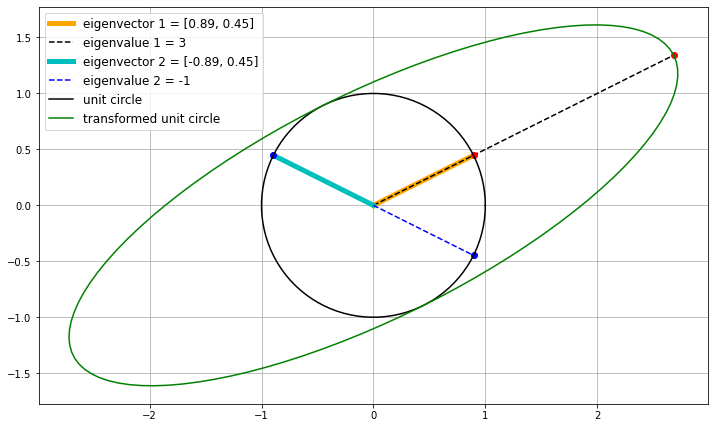

The eigenvectors are not orthogonal


In [7]:
M = np.array([[1, 4],
              [1, 1]])

# call the function we defined above
plot_ellipse(M)

## Repeated eigenvalues

**Slide 24**

In [8]:
#NOTE: Here we could also define mA using numpy.identity(2).
mA = np.array([[1, 0],
               [0, 1]])

#NOTE: NumPy will give ALL eigenvalues, including the repeated ones.
(sEigValues, vEigVectors) = np.linalg.eig(mA)

for i in range(0, len(sEigValues)):
    print("Eigenvalue #", str(i+1), " is: ", sEigValues[i]) 
    print("The corresponding eigenvector is:\n", vEigVectors[:,i]) 

Eigenvalue # 1  is:  1.0
The corresponding eigenvector is:
 [1. 0.]
Eigenvalue # 2  is:  1.0
The corresponding eigenvector is:
 [0. 1.]


## Real and complex eigenvalues

**Slide 28**

NumPy prints out complex numbers in the form \\(c = a + bj\\), where \\(j\\) is the imaginary number. We can use `numpy.real(c)` and `numpy.imag(c)` to print the real and imaginary parts respectively.

In [9]:
mA = np.array([[0, 1],
               [-1, 0]]) 

sEigValues = np.linalg.eigvals(mA) 
print("The eigenvalues of A are:", sEigValues) 
print("The real part of the first eigenvalue is:", np.real(sEigValues[0])) 
print("The imaginary part of the first eigenvalue is:", np.imag(sEigValues[0])) 

The eigenvalues of A are: [0.+1.j 0.-1.j]
The real part of the first eigenvalue is: 0.0
The imaginary part of the first eigenvalue is: 1.0


## Example eigenvalue problem

**Slide 30**

In [10]:
mM = np.array([[3, -1],
               [-1, 3]])

(sEigValues, vEigVectors) = np.linalg.eig(mA)
for i in range(0, len(sEigValues)):
    print("Eigenvalue #", i+1, "is:", sEigValues[i]) 
    print("The corresponding eigenvector is:\n", vEigVectors[:,i]) 

Eigenvalue # 1 is: 1j
The corresponding eigenvector is:
 [0.70710678+0.j         0.        +0.70710678j]
Eigenvalue # 2 is: -1j
The corresponding eigenvector is:
 [0.70710678-0.j         0.        -0.70710678j]


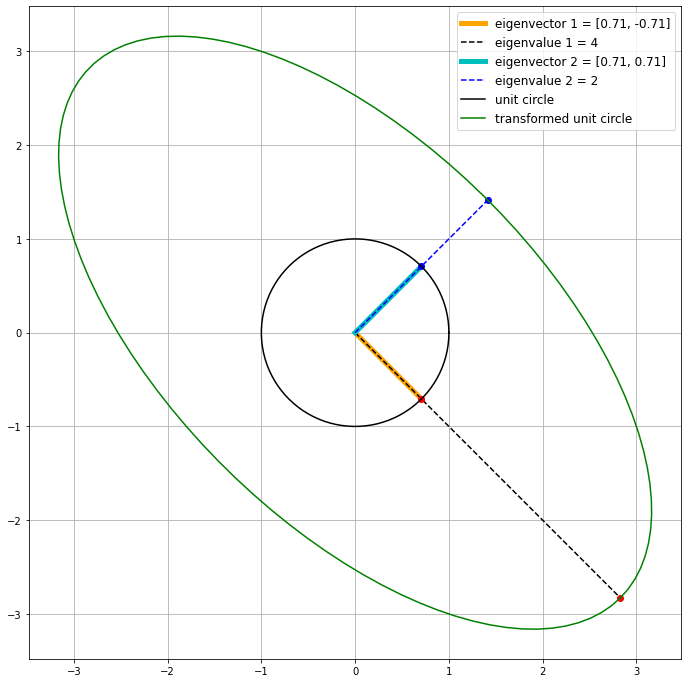

The eigenvectors are orthogonal


In [11]:
M = np.array([[3, -1],
              [-1, 3]])

# call the function we defined above
plot_ellipse(M)

## Symmetric matrices

**Slide 31**

Unfortunately, because referencing a column of the matrix vEigVectors also returns another array data type (essentially a 'sub-array' of vEigVectors), we cannot use the `numpy.dot` function (which only operates on vectors/1D arrays). Instead, we'll simply use `numpy.transpose` to perform the dot product instead.

Note: We could also use [`numpy.vdot`](https://numpy.org/doc/stable/reference/generated/numpy.vdot.html) - read the documentation for more info.

In [12]:
mNonSymmetric = np.array([[1, 4],
                          [1, 1]])
                              
(sEigValues, vEigVectors) = np.linalg.eig(mNonSymmetric)

for i in range(0, len(sEigValues)):
    print("Eigenvalue #", i+1, "is:", sEigValues[i]) 
    print("The corresponding eigenvector is:\n", vEigVectors[:,i]) 

print("The dot product of the two eigenvectors is:", np.transpose(vEigVectors[:,0]) @ vEigVectors[:,1]) 

Eigenvalue # 1 is: 3.0000000000000004
The corresponding eigenvector is:
 [0.89442719 0.4472136 ]
Eigenvalue # 2 is: -0.9999999999999996
The corresponding eigenvector is:
 [-0.89442719  0.4472136 ]
The dot product of the two eigenvectors is: -0.6000000000000001


Above, the dot product of the two eigenvectors was different from zero. 

Below, the dot product should be zero as the two eigenvectors are orthogonal for any symmetric matrix.

In [13]:
mSymmetric = np.array([[3, -1],
                       [-1, 3]])
                              
(sEigValues, vEigVectors) = np.linalg.eig(mSymmetric)
for i in range(0, len(sEigValues)):
    print("Eigenvalue #", str(i+1), " is: ", sEigValues[i]) 
    print("The corresponding eigenvector is:\n", vEigVectors[:,i]) 

print("The dot product of the two eigenvectors is: ", np.transpose(vEigVectors[:,0]) @ vEigVectors[:,1]) 

Eigenvalue # 1  is:  4.0
The corresponding eigenvector is:
 [ 0.70710678 -0.70710678]
Eigenvalue # 2  is:  2.0
The corresponding eigenvector is:
 [0.70710678 0.70710678]
The dot product of the two eigenvectors is:  0.0


## Eigenvalue problem for a \\(3 \times 3\\) matrix

**Slide 37**

In [14]:
mM = np.array([[2, 2, 1],
               [1, 3, 1],
               [1, 2, 2]])

(sEigValues, vEigVectors) = np.linalg.eig(mM)

for i in range(0, len(sEigValues)):
    print("Eigenvalue #", i+1, " is: ", sEigValues[i]) 
    print("The corresponding eigenvector is:\n", vEigVectors[:,i]) 

Eigenvalue # 1  is:  1.0
The corresponding eigenvector is:
 [-0.90453403  0.30151134  0.30151134]
Eigenvalue # 2  is:  4.999999999999998
The corresponding eigenvector is:
 [0.57735027 0.57735027 0.57735027]
Eigenvalue # 3  is:  0.9999999999999997
The corresponding eigenvector is:
 [ 0.04093652 -0.46313831  0.88534011]


If the values of \\(x_1, x_2\\) or \\(x_3\\) are 'free' (i.e. can be chosen arbitrarily to obtain an independent eigenvector), NumPy does not necessarily choose values of 0 or 1, which is why the eigenvectors printed out here are different from those in your notes. They still satisfy the equation \\( \(A - \lambda I) \mathbf{x} = 0\\) and are still independent eigenvectors.